In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

#data frames from initial csv files
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

#merge ride and city data into one dataframe based on common city name
combined_ride_data_df=pd.merge(city_data_df, ride_data_df, how="outer", on="city")

In [3]:
combined_ride_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
#create list of number of drivers in each city
city_aggregate_df=combined_ride_data_df.drop_duplicates("city")

#set index of data fram to city; no reason for these data to be numbered
city_aggregate_df=city_aggregate_df.set_index("city")

#create lists of both driver count and city type separately
driver_count = city_aggregate_df["driver_count"]
city_type=city_aggregate_df["type"]



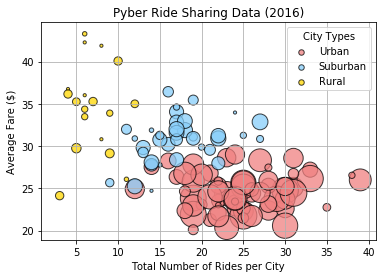

In [5]:
#create data frame for city rides data with initial data of city type and driver count for each city as defined above
city_rides_data = pd.DataFrame({"Type":city_type,
                                "Driver Count":driver_count
})

#create groupby object by city from combined dataframe
city_total_rides = combined_ride_data_df.groupby(["city"])

#x axis data is count of total individual rides per city
city_rides_data["Rides per City"]= city_total_rides["ride_id"].count()

#y axis data is average fare in each city
city_rides_data["Average Fare"]=city_total_rides["fare"].mean()

#ultimately bubble plot will be by city type, not by city, so set new index to city
#break data set into each sub-type:  one for urban, rural, and suburban

urban_rides_data=city_rides_data.loc[city_rides_data["Type"] == "Urban"]
suburban_rides_data=city_rides_data.loc[city_rides_data["Type"] == "Suburban"]
rural_rides_data=city_rides_data.loc[city_rides_data["Type"] == "Rural"]

#create individual scatter plot objects for each city type
plt.scatter(x=urban_rides_data["Rides per City"], y=urban_rides_data["Average Fare"], marker="o", facecolors="lightcoral", edgecolors="black", s=urban_rides_data["Driver Count"]*10, alpha=0.75, label="Urban")
plt.scatter(x=suburban_rides_data["Rides per City"], y=suburban_rides_data["Average Fare"], marker="o", facecolors="lightskyblue", edgecolors="black", s=suburban_rides_data["Driver Count"]*10, alpha=0.75, label="Suburban")
plt.scatter(x=rural_rides_data["Rides per City"], y=rural_rides_data["Average Fare"], marker="o", facecolors="gold", edgecolors="black", s=rural_rides_data["Driver Count"]*10, alpha=0.75, label="Rural")

#create title and x and y axis labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")

#add grid to chart
plt.grid()

#add legend variable with associated title
lgnd=plt.legend(title="City Types")

#ensure each legend entry is the same size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()


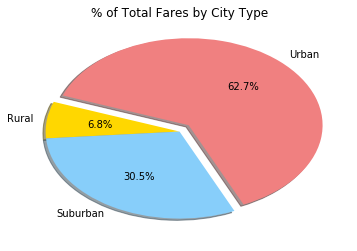

In [6]:
#Percent of total fares by city type

#groupby fare type into new variable
fares_data=combined_ride_data_df.groupby("type")

#calculate total sum of the fares for each type and divide by total fares for all types
fares_by_type=fares_data["fare"].sum()/combined_ride_data_df["fare"].sum()

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

explode = [0,0, 0.1]

labels = ["Rural", "Suburban", "Urban"]

plt.pie(fares_by_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)

plt.title("% of Total Fares by City Type")

plt.show()


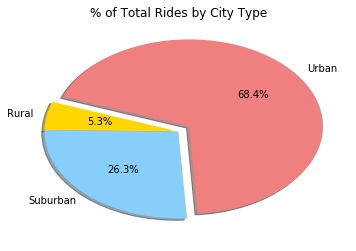

In [23]:
# Percent of total rides by city type

#using previous groupby object sorted by type, count number of rides for each type and divide by total number of rides.
rides_by_type=fares_data["ride_id"].count()/combined_ride_data_df["ride_id"].count()

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

explode = [0,0, 0.1]

labels = ["Rural", "Suburban", "Urban"]

plt.pie(rides_by_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)

plt.title("% of Total Rides by City Type")

plt.show()

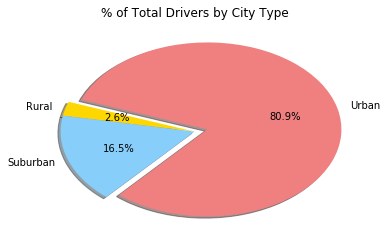

In [24]:
#group data frame, that has removed duplicate cities, by type; need to drop duplicates to get correct driver count.
drivers=city_aggregate_df.groupby("type")

#drivers by type is sum of each driver count by city type divided by total drivers
driver_by_type=drivers["driver_count"].sum()/city_aggregate_df["driver_count"].sum()

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

explode = [0,0, 0.1]

labels = ["Rural", "Suburban", "Urban"]

plt.pie(driver_by_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)

plt.title("% of Total Drivers by City Type")

plt.show()

